**순환 신경망(Recurrent Neural Network, RNN)**
- DFN의 시계열 데이터 처리의 한계점 해결하기 위한 신경망
- 유닛 간 연결이 순환적 구조를 이룸
- 신경망 내부에 상태를 저장할 수 있게 함으로써
- 내부의 메모리를 이용해 시퀀스 형태의 입력 처리
- 문자열, 센서 데이터, 음성인식과 같이 시간적으로 연속성이 있는 데이터 처리에 용이
- 층이 많은 네트워크에서 나타나는 그래디언트(기울기) 소실 문제(vanishing gradient problem) 발생
- 오랜 시간에 결쳐 학습시 gradient가 소실하는 문제

- 여러 개의 데이터가 순서대로 입력되었을 때 
    - 앞서 입력받은 데이터를 잠시 기억해 놓는 방법
    - 기억된 데이터가 얼마나 중요한지를 판단하여 
    - 별도의 가중치를 줘서 다음 데이터로 넘어감
- 모든 입력 값에 이 작업을 순서대로 실행하므로 
    - 다음 층으로 넘어가기 전에 같은 층을 맴도는 것처럼 보임

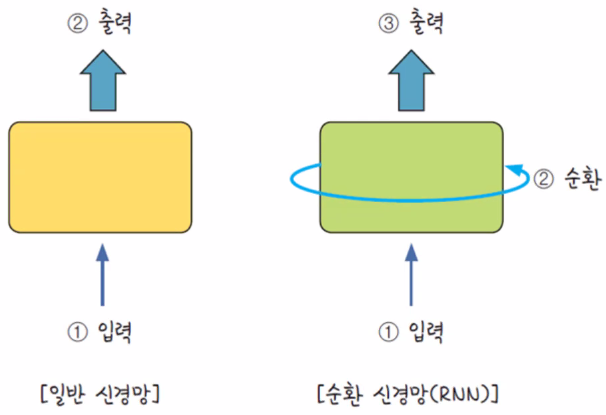

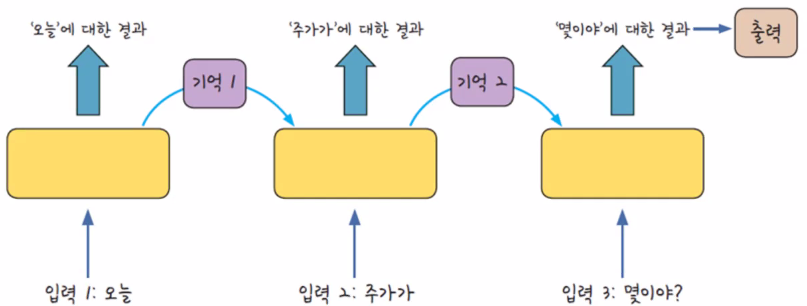

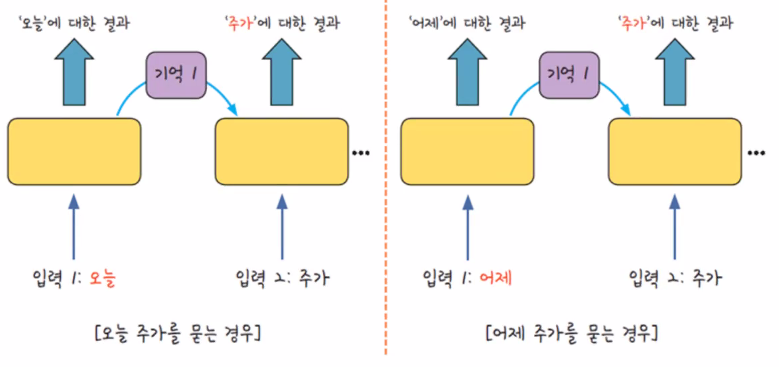

#### 케라스의 순환층

In [1]:
from tensorflow.keras.layers import SimpleRNN

#### `SimpleRNN`
- 다른 케라스 층과 마찬가지로 시퀀스 배치를 처리
- `(batch_size, timesteps, input_features)` 크기의 입력을 받는다

- 케라스에 있는 모든 순환 층과 동일하게 `SimpleRNN`은 두 가지 모드로 실행가능
- 각 타임스텝의 출력을 모은 전체 시퀀스를 반환 (크기가 `(batch_size, timesteps, output_features)`인 3D 텐서)
- 입력 시퀀스에 대한 마지막 출력만 반환 (크기가 `(batch_size, output_features)`인 2D 텐서)
    - 이 모드는 객체를 생성할 때 `return_sequences` 매개변수로 선택할 수 있음

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

In [4]:
model = Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환 층을 차례대로 쌓는 것이 유용할 때가 있음
- **이런 설정**에서는 중간 층들이 전체 출력 시퀀스를 반환하도록 설정해야 함

In [6]:
model = Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))## RNN을 계속 받을 경울 True 설정
model.add(SimpleRNN(32, return_sequences=False)) ## 맨 위층만 마지막 출력을 False
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 38,240
Trainable params: 38,240
Non-trainable params: 0
_________________________________________________________________


**IMDB 영화리뷰 문제에 RNN 적용**

**데이터 전처리**

In [8]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 1000  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')


데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스


In [9]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen) ## 테스트에 1000개의 단어
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

input_train 크기: (25000, 1000)
input_test 크기: (25000, 1000)


In [13]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 23s 143ms/step - loss: 0.6310 - acc: 0.6237 - val_loss: 0.5063 - val_acc: 0.7776
Epoch 2/10
157/157 [==============================] - 22s 140ms/step - loss: 0.3770 - acc: 0.8431 - val_loss: 0.4543 - val_acc: 0.7862
Epoch 3/10
157/157 [==============================] - 22s 141ms/step - loss: 0.2655 - acc: 0.8945 - val_loss: 0.4079 - val_acc: 0.8220
Epoch 4/10
157/157 [==============================] - 22s 142ms/step - loss: 0.1931 - acc: 0.9304 - val_loss: 0.5632 - val_acc: 0.7894
Epoch 5/10
157/157 [==============================] - 22s 142ms/step - loss: 0.1360 - acc: 0.9538 - val_loss: 0.4943 - val_acc: 0.7960
Epoch 6/10
157/157 [==============================] - 22s 141ms/step - loss: 0.0853 - acc: 0.9731 - val_loss: 0.5759 - val_acc: 0.8362
Epoch 7/10
157/157 [==============================] - 22s 140ms/step - loss: 0.0506 - acc: 0.9858 - val_loss: 0.4893 - val_acc: 0.8568
Epoch 8/10
157/157 [==============================] - 2

In [16]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 13s 17ms/step - loss: 0.6706 - acc: 0.8186


[0.6705922484397888, 0.8186399936676025]

### 시각화

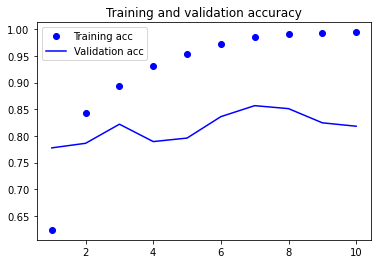

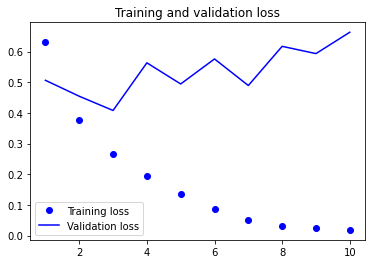

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#### 결과
- 05_이진분류 예제에서 epoch 4번을 학습시켠 얻은 테스트 정확도 88%
- 07_자연어 처리 예제dptj epoch 10번을 학습시켜 얻은 학습 정확도 88% val_acc=75% 
- 간단한 순환 네트워크는 기준 모델 (일찍 학습을 중단) 보다 성능이 높지 않음
- SimpleRNN은 텍스트와 같이 긴 시퀀스를 처리하는데는 적합하지 않음

### **Long Short-Term Memory (LSTM)**

- RNN에서 발생하는 그래디언트 소실 문제를 해결하기 위해 제안
- 한 층 안에서 반복을 많이 해야 하는 RNN의 특성상 
- 일반 신경망보다 기울기 소실 문제가 더 많이 살행하고
- 이를 보완하기 위한 방법
- 즉, 반복되기 직전에 다음 층으로 
- 기억된 값을 넘길지 안 넘길지를 관리하는 단계를 하나 더 추가


- 실전에서 응용들은 대부분 이 LSTM을 이용하여 구현
- forget gate, input gate, output gate라는 새로운 요소를 은닉층의 각 뉴런에 추가


RNN(LSTM)의 장점  
- 입력 값과 출력 값을 어떻게 설정하느냐에 따라
- 여러 가지 상황에 적용할 수 있다는 것  
(1) 다수 입력 단일 출력  
(2) 단일 입력 다수 출력  
(3) 다수 입력 다수 출력


In [18]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 52s 325ms/step - loss: 0.4925 - acc: 0.7698 - val_loss: 0.3663 - val_acc: 0.8512
Epoch 2/10
157/157 [==============================] - 50s 321ms/step - loss: 0.2947 - acc: 0.8866 - val_loss: 0.2818 - val_acc: 0.8850
Epoch 3/10
157/157 [==============================] - 49s 310ms/step - loss: 0.2298 - acc: 0.9126 - val_loss: 0.3440 - val_acc: 0.8842
Epoch 4/10
157/157 [==============================] - 49s 310ms/step - loss: 0.1988 - acc: 0.9274 - val_loss: 0.3364 - val_acc: 0.8580
Epoch 5/10
157/157 [==============================] - 49s 312ms/step - loss: 0.1741 - acc: 0.9374 - val_loss: 0.3135 - val_acc: 0.8724
Epoch 6/10
157/157 [==============================] - 49s 311ms/step - loss: 0.1578 - acc: 0.9437 - val_loss: 0.4155 - val_acc: 0.8402
Epoch 7/10
157/157 [==============================] - 49s 311ms/step - loss: 0.1442 - acc: 0.9502 - val_loss: 0.3014 - val_acc: 0.8864
Epoch 8/10
157/157 [==============================] - 4

In [19]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 32s 40ms/step - loss: 0.4613 - acc: 0.8577


[0.46126696467399597, 0.8576800227165222]

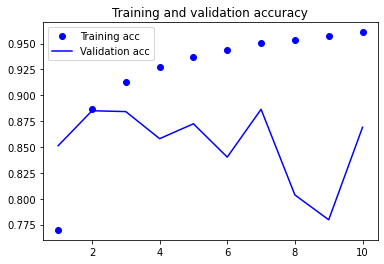

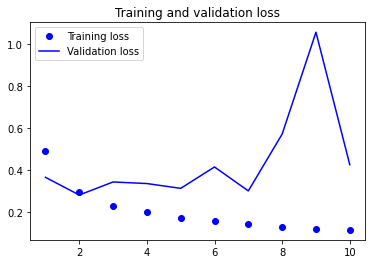

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
### SimpleRNN과 비교
- SimpleRNN이 75%의 예측
- LSTM 85%의 예측
- 그래프상